In [99]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats

# Load the provided .mat file
file_path = '../Data/02_SVM_Accuracy.mat'
data = scipy.io.loadmat(file_path)

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'subsetStartFromStartSpa', 'notSubsetStartFromStartSpa', 'subsetGoalFromStartSpa', 'notSubsetGoalFromStartSpa', 'subsetStartFromGoalSpa', 'notSubsetStartFromGoalSpa', 'subsetGoalFromGoalSpa', 'notSubsetGoalFromGoalSpa', 'subsetStartFromStartCue', 'notSubsetStartFromStartCue', 'subsetGoalFromStartCue', 'notSubsetGoalFromStartCue', 'subsetStartFromGoalCue', 'notSubsetStartFromGoalCue', 'subsetGoalFromGoalCue', 'notSubsetGoalFromGoalCue', 'subsetStartFromStartSpaSig', 'notSubsetStartFromStartSpaSig', 'subsetGoalFromStartSpaSig', 'notSubsetGoalFromStartSpaSig', 'subsetStartFromGoalSpaSig', 'notSubsetStartFromGoalSpaSig', 'subsetGoalFromGoalSpaSig', 'notSubsetGoalFromGoalSpaSig', 'subsetStartFromStartCueSig', 'notSubsetStartFromStartCueSig', 'subsetGoalFromStartCueSig', 'notSubsetGoalFromStartCueSig', 'subsetStartFromGoalCueSig', 'notSubsetStartFromGoalCueSig', 'subsetGoalFromGoalCueSig', 'notSubsetGoalFromGoalCueSig'])

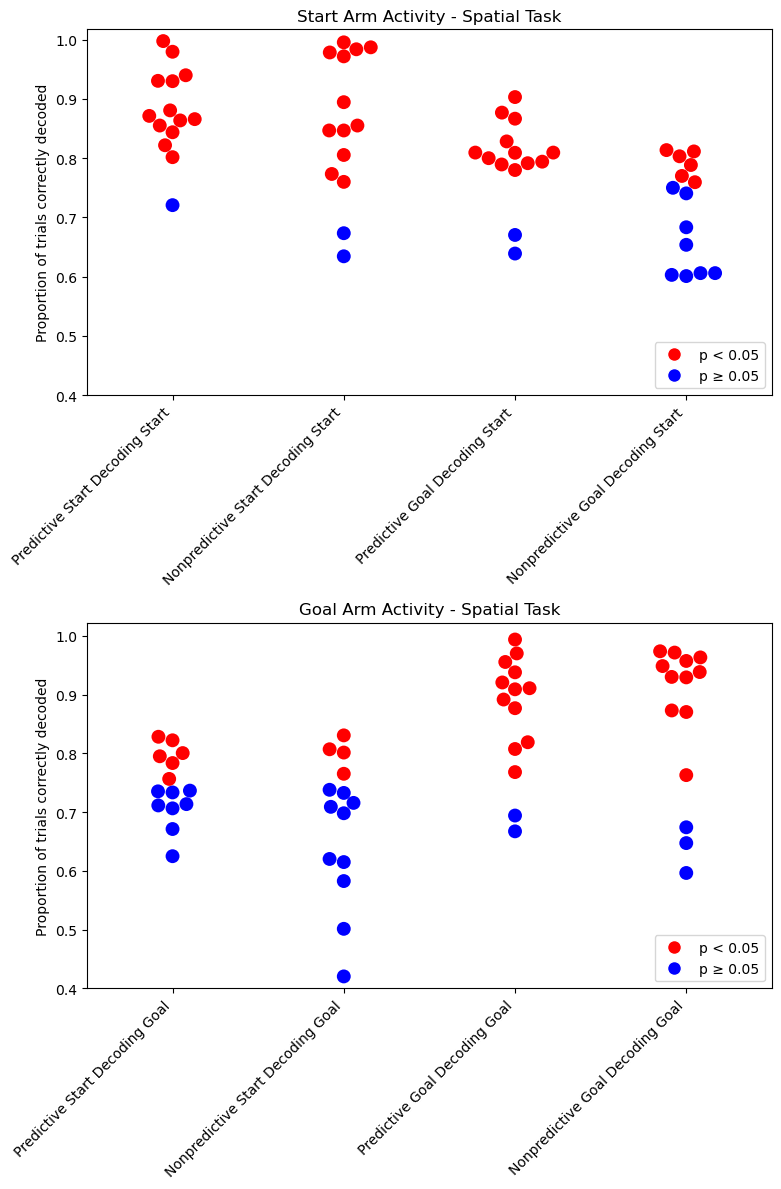

In [100]:
# Function to create DataFrame with task data, significance, and subset labels
def create_dataframe(task_predictive, task_nonpredictive, sig_predictive, sig_nonpredictive, label):
    # Combining task data
    task_combined = np.concatenate((task_predictive, task_nonpredictive))
    # Combining significance data
    sig_combined = np.concatenate((sig_predictive, sig_nonpredictive))
    # Labels for predictive and nonpredictive subsets
    labels = [f'Predictive {label}'] * len(task_predictive) + [f'Nonpredictive {label}'] * len(task_nonpredictive)

    df = pd.DataFrame({
        'Accuracy': task_combined,
        'Sig': sig_combined,
        'Label': labels
    })
    df['Color'] = df['Sig'].apply(lambda x: 'red' if x == 1 else 'blue')
    return df

# Define a color mapping based on the unique values in the 'Color' column
color_mapping = {'red': 'red', 'blue': 'blue'}

# Creating dataframes for spatial task
df_start_from_start_spa = create_dataframe(data['subsetStartFromStartSpa'][0], data['notSubsetStartFromStartSpa'][0], 
                                       data['subsetStartFromStartSpaSig'][0], data['notSubsetStartFromStartSpaSig'][0], 'Start Decoding Start')
df_goal_from_start_spa = create_dataframe(data['subsetGoalFromStartSpa'][0], data['notSubsetGoalFromStartSpa'][0], 
                                      data['subsetGoalFromStartSpaSig'][0], data['notSubsetGoalFromStartSpaSig'][0], 'Goal Decoding Start')
df_start_from_goal_spa = create_dataframe(data['subsetStartFromGoalSpa'][0], data['notSubsetStartFromGoalSpa'][0], 
                                      data['subsetStartFromGoalSpaSig'][0], data['notSubsetStartFromGoalSpaSig'][0], 'Start Decoding Goal')
df_goal_from_goal_spa = create_dataframe(data['subsetGoalFromGoalSpa'][0], data['notSubsetGoalFromGoalSpa'][0], 
                                     data['subsetGoalFromGoalSpaSig'][0], data['notSubsetGoalFromGoalSpaSig'][0], 'Goal Decoding Goal')

# Concatenate data for each subplot
df_start_arm_activity_spa = pd.concat([df_start_from_start_spa, df_goal_from_start_spa], ignore_index=True)
df_goal_arm_activity_spa = pd.concat([df_start_from_goal_spa, df_goal_from_goal_spa], ignore_index=True)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Plot 1: Start Arm Activity with significance coloring
sns.swarmplot(x='Label', y='Accuracy', hue='Color', data=df_start_arm_activity_spa, ax=axes[0], palette=color_mapping, size=10, dodge=False)
axes[0].set_title('Start Arm Activity - Spatial Task')
axes[0].set_xticks(range(len(df_start_arm_activity_spa['Label'].unique())))
axes[0].set_xticklabels(df_start_arm_activity_spa['Label'].unique(), rotation=45, ha='right')
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion of trials correctly decoded')
axes[0].set_ylim(bottom=0.4)
# axes[0].get_legend().remove()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='p < 0.05', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='p ≥ 0.05', markerfacecolor='blue', markersize=10)]
axes[0].legend(handles=legend_elements, loc='lower right')

# Plot 2: Goal Arm Activity with significance coloring
sns.swarmplot(x='Label', y='Accuracy', hue='Color', data=df_goal_arm_activity_spa, ax=axes[1], palette=color_mapping, size=10, dodge=False)
axes[1].set_title('Goal Arm Activity - Spatial Task')
axes[1].set_xticks(range(len(df_goal_arm_activity_spa['Label'].unique())))
axes[1].set_xticklabels(df_goal_arm_activity_spa['Label'].unique(), rotation=45, ha='right')
axes[1].set_xlabel('')
axes[1].set_ylabel('Proportion of trials correctly decoded')
axes[1].set_ylim(bottom=0.4)
# axes[1].get_legend().remove()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='p < 0.05', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='p ≥ 0.05', markerfacecolor='blue', markersize=10)]
axes[1].legend(handles=legend_elements, loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Fig_2a.tiff', format='tiff')
plt.show()

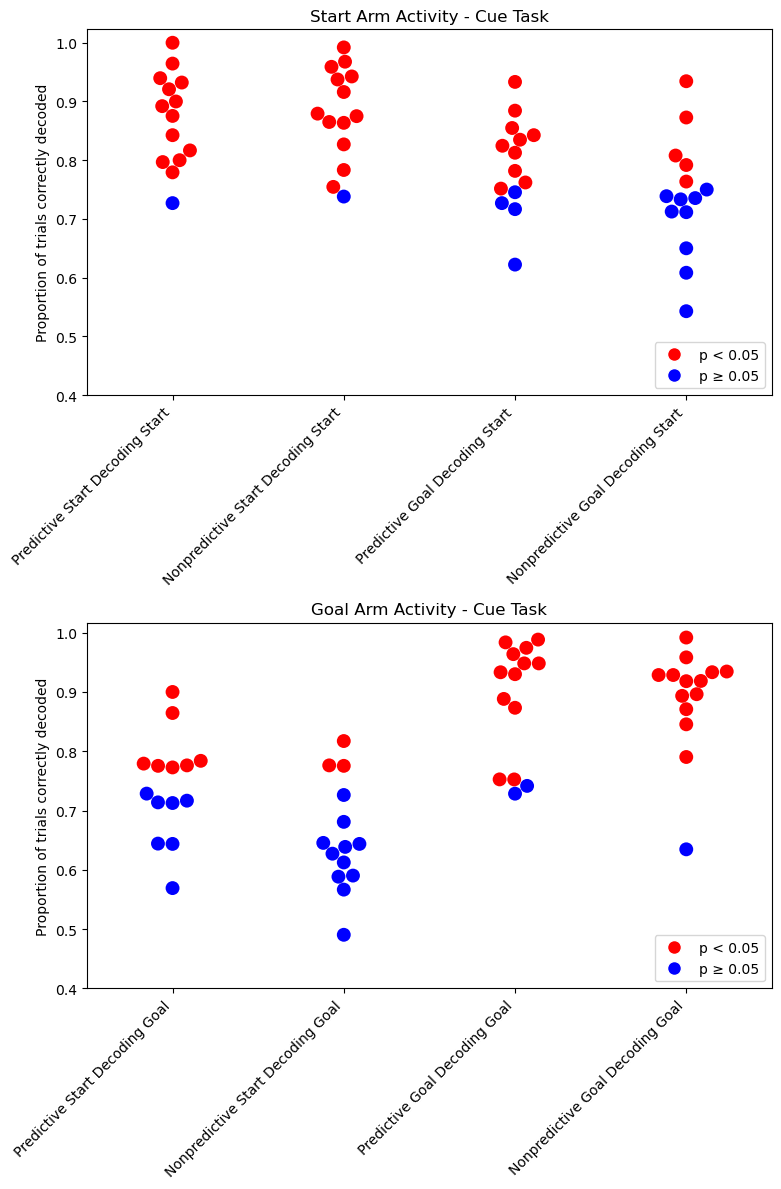

In [101]:
# Creating dataframes for cue task
df_start_from_start_cue = create_dataframe(data['subsetStartFromStartCue'][0], data['notSubsetStartFromStartCue'][0], 
                                       data['subsetStartFromStartCueSig'][0], data['notSubsetStartFromStartCueSig'][0], 'Start Decoding Start')
df_goal_from_start_cue = create_dataframe(data['subsetGoalFromStartCue'][0], data['notSubsetGoalFromStartCue'][0], 
                                      data['subsetGoalFromStartCueSig'][0], data['notSubsetGoalFromStartCueSig'][0], 'Goal Decoding Start')
df_start_from_goal_cue = create_dataframe(data['subsetStartFromGoalCue'][0], data['notSubsetStartFromGoalCue'][0], 
                                      data['subsetStartFromGoalCueSig'][0], data['notSubsetStartFromGoalCueSig'][0], 'Start Decoding Goal')
df_goal_from_goal_cue = create_dataframe(data['subsetGoalFromGoalCue'][0], data['notSubsetGoalFromGoalCue'][0], 
                                     data['subsetGoalFromGoalCueSig'][0], data['notSubsetGoalFromGoalCueSig'][0], 'Goal Decoding Goal')

# Concatenate data for each subplot
df_start_arm_activity_cue = pd.concat([df_start_from_start_cue, df_goal_from_start_cue], ignore_index=True)
df_goal_arm_activity_cue = pd.concat([df_start_from_goal_cue, df_goal_from_goal_cue], ignore_index=True)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Plot 1: Start Arm Activity with significance coloring
sns.swarmplot(x='Label', y='Accuracy', hue='Color', data=df_start_arm_activity_cue, ax=axes[0], palette=color_mapping, size=10, dodge=False)
axes[0].set_title('Start Arm Activity - Cue Task')
axes[0].set_xticks(range(len(df_start_arm_activity_cue['Label'].unique())))
axes[0].set_xticklabels(df_start_arm_activity_cue['Label'].unique(), rotation=45, ha='right')
axes[0].set_xlabel('')
axes[0].set_ylabel('Proportion of trials correctly decoded')
axes[0].set_ylim(bottom=0.4)
# axes[0].get_legend().remove()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='p < 0.05', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='p ≥ 0.05', markerfacecolor='blue', markersize=10)]
axes[0].legend(handles=legend_elements, loc='lower right')

# Plot 2: Goal Arm Activity with significance coloring
sns.swarmplot(x='Label', y='Accuracy', hue='Color', data=df_goal_arm_activity_cue, ax=axes[1], palette=color_mapping, size=10, dodge=False)
axes[1].set_title('Goal Arm Activity - Cue Task')
axes[1].set_xticks(range(len(df_goal_arm_activity_cue['Label'].unique())))
axes[1].set_xticklabels(df_goal_arm_activity_cue['Label'].unique(), rotation=45, ha='right')
axes[1].set_xlabel('')
axes[1].set_ylabel('Proportion of trials correctly decoded')
axes[1].set_ylim(bottom=0.4)
# axes[1].get_legend().remove()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='p < 0.05', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='p ≥ 0.05', markerfacecolor='blue', markersize=10)]
axes[1].legend(handles=legend_elements, loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Fig_2b.tiff', format='tiff')
plt.show()

In [102]:
for key, value in data.items():
    if "__" not in key and "Sig" not in key:
        keySig = key + "Sig"
        print("%s stats: %f ± %f, %d/%d" % (key, np.mean(value.flatten()), scipy.stats.sem(value.flatten(), ddof=0),
                                           np.sum(data[keySig].flatten()), len(data[keySig].flatten())))

subsetStartFromStartSpa stats: 0.878767 ± 0.018869, 13/14
notSubsetStartFromStartSpa stats: 0.857611 ± 0.030656, 12/14
subsetGoalFromStartSpa stats: 0.797670 ± 0.018259, 12/14
notSubsetGoalFromStartSpa stats: 0.713534 ± 0.021802, 6/14
subsetStartFromGoalSpa stats: 0.744189 ± 0.014949, 6/14
notSubsetStartFromGoalSpa stats: 0.681224 ± 0.030790, 4/14
subsetGoalFromGoalSpa stats: 0.865808 ± 0.025963, 12/14
notSubsetGoalFromGoalSpa stats: 0.859678 ± 0.034107, 11/14
subsetStartFromStartCue stats: 0.870508 ± 0.020342, 13/14
notSubsetStartFromStartCue stats: 0.878643 ± 0.020648, 13/14
subsetGoalFromStartCue stats: 0.792439 ± 0.020439, 10/14
notSubsetGoalFromStartCue stats: 0.739520 ± 0.025688, 5/14
subsetStartFromGoalCue stats: 0.741490 ± 0.022345, 7/14
notSubsetStartFromGoalCue stats: 0.655688 ± 0.023451, 3/14
subsetGoalFromGoalCue stats: 0.886184 ± 0.025480, 12/14
notSubsetGoalFromGoalCue stats: 0.888779 ± 0.022701, 13/14
